In [484]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [485]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np
import math

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, cross_val_predict
import random
from sklearn import compose
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import resample
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error
import statsmodels.api as sm

# just for the sake of this
from warnings import filterwarnings
filterwarnings('ignore')

# Data Preparation & Understanding the data

In [486]:
df = pd.read_csv('/Users/nicholaschoong/Downloads/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2022__Data_for_Calendar_Year_2021_.csv')

In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29842 entries, 0 to 29841
Data columns (total 59 columns):
 #   Column                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                             --------------  -----  
 0   Property Id                                                                                                        29842 non-null  int64  
 1   Property Name                                                                                                      29842 non-null  object 
 2   NYC Building Identification Number (BIN)                                                                           29786 non-null  object 
 3   City                                                                                                               29842 non-null  object 
 4   Postal Code           

In [488]:
df.head()

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postal Code,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,National Median Reference Property Type,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,National Median ENERGY STAR Score,Target ENERGY STAR Score,Reason(s) for No Score,ENERGY STAR Certification - Year(s) Certified (Score),ENERGY STAR Certification - Eligibility,ENERGY STAR Certification - Last Approval Date,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Source Energy Use (kBtu),Weather Normalized Source Energy Use (kBtu),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Natural Gas Use (therms),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kWh),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kBtu),Electricity Use – Generated from Onsite Renewable Systems (kWh),Electricity Use – Generated from Onsite Renewable Systems and Exported (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Annual Maximum Demand (Meter Name (Meter ID)),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft²),Direct GHG Emissions Intensity (kgCO2e/ft²),Indirect GHG Emissions (Metric Tons CO2e),Net Emissions (Metric Tons CO2e),Indirect GHG Emissions Intensity (kgCO2e/ft²),National Median Total GHG Emissions (Metric Tons CO2e),eGRID Output Emissions Rate (kgCO2e/MBtu),Avoided Emissions - Onsite Green Power (Metric Tons CO2e),Avoided Emissions - Offsite Green Power (Metric Tons CO2e),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Percent of Electricity that is Green Power,Percent of RECs Retained,Percent of Total Electricity Generated from Onsite Renewable Systems,LEED US Project ID,Adult Education - Gross Floor Area (ft²),Ambulatory Surgical Center - Gross Floor Area (ft²),Automobile Dealership - Gross Floor Area (ft²),Bank Branch - Gross Floor Area (ft²),Barracks- Gross Floor Area (ft²),College/University - Gross Floor Area (ft²),Convention Center - Gross Floor Area (ft²),Courthouse - Gross Floor Area (ft²),Data Center - Gross Floor Area (ft²),Data Center - UPS System Redundancy,Data Center - Cooling Equipment Redundancy,Data Center - IT Energy Configuration,Data Center - Energy Estimates Applied,Data Center - UPS Output Meter (kWh),Data Center - PDU Input Meter (kWh),Data Center - PDU Output Meter (kWh),Data Center - IT Equipment Input Meter (kWh),Data Center - IT Site Energy (kWh),Data Center - IT Source Energy (kBtu),Data Center - PUE,Dat

In [489]:
len(df)

29842

# Data Cleaning & Filling in Missing Data

In [490]:
# Replace 'Not Applicable' and 'Not Available' with NaN
df = df.replace({'Not Applicable': np.nan, 'Not Available': np.nan})

# Select specific columns that are relevant 
selected_columns = ['Property Id', 'Property Name', 'NYC Building Identification Number (BIN)', 'City', 'Postal Code',
                     'Primary Property Type - Self Selected', 'Primary Property Type - Portfolio Manager-Calculated',
                     'List of All Property Use Types at Property', 'Largest Property Use Type - Gross Floor Area (ft²)',
                     'Year Built', 'Number of Buildings', 'ENERGY STAR Score', 'National Median ENERGY STAR Score',
                     'ENERGY STAR Certification - Eligibility', 'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
                     'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)', 'Weather Normalized Site Energy Use (kBtu)',
                     'Weather Normalized Site Electricity Intensity (kWh/ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
                     'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)', 'National Median Source EUI (kBtu/ft²)',
                     'Source Energy Use (kBtu)', 'Weather Normalized Source Energy Use (kBtu)', 'Natural Gas Use (kBtu)',
                     'Natural Gas Use (therms)', 'Weather Normalized Site Natural Gas Use (therms)', 'Electricity Use - Grid Purchase (kBtu)',
                     'Weather Normalized Site Electricity (kWh)', 'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh)',
                     'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)', 'Green Power - Offsite (kWh)',
                     'Green Power - Onsite and Offsite (kWh)', 'Total GHG Emissions (Metric Tons CO2e)', 'Total GHG Emissions Intensity (kgCO2e/ft²)',
                     'Net Emissions (Metric Tons CO2e)', 'National Median Total GHG Emissions (Metric Tons CO2e)', 'eGRID Output Emissions Rate (kgCO2e/MBtu)',
                     'Percent of Electricity that is Green Power', 'Multifamily Housing - Gross Floor Area (ft²)',
                     'Multifamily Housing - Number of Bedrooms', 'Multifamily Housing - Number of Bedrooms Density (Number per 1,000 sq ft)',
                     'Multifamily Housing - Number of Residential Living Units in a High-Rise Building (10 or more Stories)',
                     'Multifamily Housing - Total Number of Residential Living Units',
                     'Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 sq ft)',
                     'Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 sq ft)',
                     'Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories)',
                     'Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 sq ft)',
                     'Multifamily Housing - Percent That Can Be Cooled', 'Multifamily Housing - Percent That Can Be Heated',
                     'Property GFA - Calculated (Buildings) (ft²)', 'Latitude', 'Longitude', 'Council District', 'Census Tract', 'NTA', 'Borough']

df = df[selected_columns]

# Count NaN values for each row
nan_count_per_row = df.isna().sum(axis=1)

# Filter rows where the count of NaN values is less than or equal to 10 of total columns
df_cleaned = df[nan_count_per_row <= 10]

# Display the cleaned DataFrame
df_cleaned.tail(10)

,Property Id,Property Name,NYC Building Identification Number (BIN),City,Postal Code,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,List of All Property Use Types at Property,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,ENERGY STAR Score,National Median ENERGY STAR Score,ENERGY STAR Certification - Eligibility,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Source Energy Use (kBtu),Weather Normalized Source Energy Use (kBtu),Natural Gas Use (kBtu),Natural Gas Use (therms),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft²),Net Emissions (Metric Tons CO2e),National Median Total GHG Emissions (Metric Tons CO2e),eGRID Output Emissions Rate (kgCO2e/MBtu),Percent of Electricity that is Green Power,Multifamily Housing - Gross Floor Area (ft²),Multifamily Housing - Number of Bedrooms,"Multifamily Housing - Number of Bedrooms Density (Number per 1,000 sq ft)",Multifamily Housing - Number of Residential Living Units in a High-Rise Building (10 or more Stories),Multifamily Housing - Total Number of Residential Living Units,"Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 sq ft)","Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 sq ft)",Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories),"Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 sq ft)",Multifamily Housing - Percent That Can Be Cooled,Multifamily Housing - Percent That Can Be Heated,Property GFA - Calculated (Buildings) (ft²),Latitude,Longitude,Council District,Census Tract,NTA,Borough
29801,12003085,75 Chrystie Street,1003445,New York,10002,Multifamily Housing,Multifamily Housing,Multifamily Housing,26965,1982,1,6,50,No,124.6,NaN,85.1,3358899.1,NaN,NaN,NaN,182.1,NaN,124.4,4909070.3,NaN,2569055.6,25690.55601,NaN,789843.5,NaN,231489.9,789843.5,0,0,194.7,7.2,194.7,133,73.8,0,26965,50,1.85426,0,35,1.29798,0,14,0.51919,100,100,26965,40.717201,-73.994318,1.0,16.0,Chinatown,MANHATTAN
29807,15116395,500 West 188th Street,"1063847, 1085392",New York,10040,Multifamily Housing,Multifamily Housing,"Multifamily Housing, Personal Services (Health...",45926,1925,1,17,50,No,123.4,130.3,97.5,5969852.3,6300541,4.8,0.3,156.5,162.3,123.6,7568066.9,7849722.9,1447324.5,14473.24513,14711.8,827163.7,233701.8,242427.8,827163.7,0,0,412.1,8.5,412.1,325.5,73.8,0,45926,62,1.35,0,54,1.1758,0,54,1.1758,90,100,48366,40.852573,-73.927919,10.0,269.0,Washington Heights North,MANHATTAN
29808,15116609,2764 Creston Avenue,2017450,Bronx,10468,Multifamily Housing,Multifamily Housing,Multifamily Housing,44000,1920,1,66,50,No,85.8,91.4,96.2,3773693.1,4023104.6,4,0,112.1,116.9,125.7,4931025.2,5145048.8,219663.2,2196.631782,2196.6,620563.5,175674.2,181876.8,620563.6,0,0,275.1,6.3,275.1,308.7,73.8,0,44000,70,1.59091,0,46,1.04546,0,46,1.04546,90,100,44000,40.869583,-73.893042,14.0,40303.0,Van Cortlandt Village,BRONX
29809,15116689,2895 Grand Concourse,2017602,Bronx,10468,Multifamily Housing,Multifamily Housing,Multifamily Housing,54000,1923,1,28,50,No,118.7,126.4,103.1,6411850.1,6823034.8,4,0.1,145.8,152.3,126.6,7873067.3,8222039.4,346232.9,346

In [491]:
df_cleaned.shape

(18453, 59)

In [492]:
# Imputation: We are going to use KNN imputation given our assumption that GHG emissions of a certain property would be similar to other properties that are nearby.
pd.isnull(df_cleaned).any()

Property Id                                                                                                          False
Property Name                                                                                                        False
NYC Building Identification Number (BIN)                                                                              True
City                                                                                                                 False
Postal Code                                                                                                          False
Primary Property Type - Self Selected                                                                                False
Primary Property Type - Portfolio Manager-Calculated                                                                 False
List of All Property Use Types at Property                                                                           False
Largest Property

In [493]:
cols_to_convert_numeric = [
    'Largest Property Use Type - Gross Floor Area (ft²)',
    'NYC Building Identification Number (BIN)',
    'ENERGY STAR Score',
    'Site EUI (kBtu/ft²)',
    'Weather Normalized Site EUI (kBtu/ft²)',
    'National Median Site EUI (kBtu/ft²)',
    'Site Energy Use (kBtu)',
    'Weather Normalized Site Energy Use (kBtu)',
    'Weather Normalized Site Electricity Intensity (kWh/ft²)',
    'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
    'Source EUI (kBtu/ft²)',
    'Weather Normalized Source EUI (kBtu/ft²)',
    'National Median Source EUI (kBtu/ft²)',
    'Source Energy Use (kBtu)',
    'Weather Normalized Source Energy Use (kBtu)',
    'Natural Gas Use (kBtu)',
    'Natural Gas Use (therms)',
    'Weather Normalized Site Natural Gas Use (therms)',
    'Electricity Use - Grid Purchase (kBtu)',
    'Weather Normalized Site Electricity (kWh)',
    'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh)',
    'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)',
    'Green Power - Offsite (kWh)',
    'Green Power - Onsite and Offsite (kWh)',
    'Total GHG Emissions (Metric Tons CO2e)',
    'Total GHG Emissions Intensity (kgCO2e/ft²)',
    'Net Emissions (Metric Tons CO2e)',
    'National Median Total GHG Emissions (Metric Tons CO2e)',
    'eGRID Output Emissions Rate (kgCO2e/MBtu)',
    'Percent of Electricity that is Green Power',
    'Multifamily Housing - Gross Floor Area (ft²)',
    'Multifamily Housing - Number of Bedrooms',
    'Multifamily Housing - Number of Bedrooms Density (Number per 1,000 sq ft)',
    'Multifamily Housing - Number of Residential Living Units in a High-Rise Building (10 or more Stories)',
    'Multifamily Housing - Total Number of Residential Living Units',
    'Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 sq ft)',
    'Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 sq ft)',
    'Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories)',
    'Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 sq ft)',
    'Multifamily Housing - Percent That Can Be Cooled',
    'Multifamily Housing - Percent That Can Be Heated',
    'Latitude',
    'Longitude',
    'Council District',
    'Census Tract'
]

# Convert specified columns to numeric, leaving non-NaN data as is
df_cleaned[cols_to_convert_numeric] = df_cleaned[cols_to_convert_numeric].apply(
    lambda x: pd.to_numeric(x, errors='coerce') if x.name in cols_to_convert_numeric else x
)

# Calculate the value of k for KNN imputation
k_value = math.floor(math.sqrt(df_cleaned.shape[0]))

# Create a KNNImputer
knn_imputer = KNNImputer(n_neighbors=k_value, weights="uniform")

# Impute missing values in the specified columns
df_cleaned[cols_to_convert_numeric] = knn_imputer.fit_transform(df_cleaned[cols_to_convert_numeric])

# Check if there are any remaining missing values after imputation
print(pd.isnull(df_cleaned[cols_to_convert_numeric]).any())

# Display the updated DataFrame
df_cleaned.tail(10)

Largest Property Use Type - Gross Floor Area (ft²)                                                                   False
NYC Building Identification Number (BIN)                                                                             False
ENERGY STAR Score                                                                                                    False
Site EUI (kBtu/ft²)                                                                                                  False
Weather Normalized Site EUI (kBtu/ft²)                                                                               False
National Median Site EUI (kBtu/ft²)                                                                                  False
Site Energy Use (kBtu)                                                                                               False
Weather Normalized Site Energy Use (kBtu)                                                                            False
Weather Normaliz

,Property Id,Property Name,NYC Building Identification Number (BIN),City,Postal Code,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,List of All Property Use Types at Property,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,ENERGY STAR Score,National Median ENERGY STAR Score,ENERGY STAR Certification - Eligibility,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Source Energy Use (kBtu),Weather Normalized Source Energy Use (kBtu),Natural Gas Use (kBtu),Natural Gas Use (therms),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft²),Net Emissions (Metric Tons CO2e),National Median Total GHG Emissions (Metric Tons CO2e),eGRID Output Emissions Rate (kgCO2e/MBtu),Percent of Electricity that is Green Power,Multifamily Housing - Gross Floor Area (ft²),Multifamily Housing - Number of Bedrooms,"Multifamily Housing - Number of Bedrooms Density (Number per 1,000 sq ft)",Multifamily Housing - Number of Residential Living Units in a High-Rise Building (10 or more Stories),Multifamily Housing - Total Number of Residential Living Units,"Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 sq ft)","Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 sq ft)",Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories),"Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 sq ft)",Multifamily Housing - Percent That Can Be Cooled,Multifamily Housing - Percent That Can Be Heated,Property GFA - Calculated (Buildings) (ft²),Latitude,Longitude,Council District,Census Tract,NTA,Borough
29801,12003085,75 Chrystie Street,1.003445e+06,New York,10002,Multifamily Housing,Multifamily Housing,Multifamily Housing,26965.0,1982,1,6.00000,50,No,124.6,85.32963,85.1,3358899.1,3.554731e+06,5.145926,0.66,182.1,121.035556,124.4,4909070.3,5.042250e+06,2569055.6,25690.556010,28048.55037,789843.5,219840.327407,231489.9,789843.5,0.0,0.0,194.7,7.2,194.7,133.0,73.8,0.0,26965.0,50.00,1.85426,0.0,35.0,1.29798,0.00000,14.0,0.51919,100.0,100.0,26965,40.717201,-73.994318,1.0,16.0,Chinatown,MANHATTAN
29807,15116395,500 West 188th Street,1.907145e+06,New York,10040,Multifamily Housing,Multifamily Housing,"Multifamily Housing, Personal Services (Health...",45926.0,1925,1,17.00000,50,No,123.4,130.30000,97.5,5969852.3,6.300541e+06,4.800000,0.30,156.5,162.300000,123.6,7568066.9,7.849723e+06,1447324.5,14473.245130,14711.80000,827163.7,233701.800000,242427.8,827163.7,0.0,0.0,412.1,8.5,412.1,325.5,73.8,0.0,45926.0,62.00,1.35000,0.0,54.0,1.17580,0.00000,54.0,1.17580,90.0,100.0,48366,40.852573,-73.927919,10.0,269.0,Washington Heights North,MANHATTAN
29808,15116609,2764 Creston Avenue,2.017450e+06,Bronx,10468,Multifamily Housing,Multifamily Housing,Multifamily Housing,44000.0,1920,1,66.00000,50,No,85.8,91.40000,96.2,3773693.1,4.023105e+06,4.000000,0.00,112.1,116.900000,125.7,4931025.2,5.145049e+06,219663.2,2196.631782,2196.60000,620563.5,175674.200000,181876.8,620563.6,0.0,0.0,275.1,6.3,275.1,308.7,73.8,0.0,44000.0,70.00,1.59091,0.0,46.0,1.04546,0.00000,46.0,1.04546,90.0,100.0,44000,40.869583,-73.893042,14.0,40303.0,Van Cortlandt Village,

In [495]:
# Remove rows with NaN values in the final 2 columns
df_final = df_cleaned.dropna()
df_final.tail(20)

,Property Id,Property Name,NYC Building Identification Number (BIN),City,Postal Code,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,List of All Property Use Types at Property,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,ENERGY STAR Score,National Median ENERGY STAR Score,ENERGY STAR Certification - Eligibility,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Source Energy Use (kBtu),Weather Normalized Source Energy Use (kBtu),Natural Gas Use (kBtu),Natural Gas Use (therms),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft²),Net Emissions (Metric Tons CO2e),National Median Total GHG Emissions (Metric Tons CO2e),eGRID Output Emissions Rate (kgCO2e/MBtu),Percent of Electricity that is Green Power,Multifamily Housing - Gross Floor Area (ft²),Multifamily Housing - Number of Bedrooms,"Multifamily Housing - Number of Bedrooms Density (Number per 1,000 sq ft)",Multifamily Housing - Number of Residential Living Units in a High-Rise Building (10 or more Stories),Multifamily Housing - Total Number of Residential Living Units,"Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 sq ft)","Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 sq ft)",Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories),"Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 sq ft)",Multifamily Housing - Percent That Can Be Cooled,Multifamily Housing - Percent That Can Be Heated,Property GFA - Calculated (Buildings) (ft²),Latitude,Longitude,Council District,Census Tract,NTA,Borough
29778,7067317,1236 OCEAN PARKWAY,3.397549e+06,Brooklyn,11230,Multifamily Housing,Multifamily Housing,"Multifamily Housing, Parking",44680.0,2012,1,61.807407,50,No,59.6,62.30000,73.2,2662695.2,2.785745e+06,5.600000,0.400000,96.2,98.800000,118.1,4297146.6,4.416174e+06,1.804800e+06,18047.999930,19336.600000,857895.2,249730.700000,251434.7,857895.2,0.0,0.0,159.2,3.6,159.2,195.4,73.8,0.0,44680.0,49.00,1.09669,0.0,19.0,0.42525,0.00000,7.0,0.15667,100.0,100.0,44680,40.618442,-73.969393,44.0,448.0,Ocean Parkway South,BROOKLYN
29779,15356512,42-11 28 AVENUE,4.012148e+06,QUEENS,11103,Multifamily Housing,Multifamily Housing,Multifamily Housing,26840.0,1926,1,58.000000,50,No,73.2,77.10000,77.5,1964894.9,2.068691e+06,5.300000,0.600000,109.2,112.700000,115.6,2932048.7,3.025863e+06,1.468375e+06,14683.753970,15808.400000,496519.5,142980.700000,145521.5,496519.4,0.0,0.0,114.6,4.3,114.6,121.3,73.8,0.0,26840.0,31.00,1.15499,0.0,27.0,1.00596,0.00000,27.0,1.00596,100.0,100.0,26840,40.764654,-73.911917,22.0,143.0,Astoria,QUEENS
29782,14363684,37 WEST END AVENUE,3.245817e+06,BROOKLYN,11235,Multifamily Housing,Multifamily Housing,"Medical Office, Multifamily Housing, Parking",45872.0,2015,1,100.000000,50,Yes,21.1,21.10000,42.6,1172079.9,1.174155e+06,6.200000,0.121481,59.1,59.200000,119.2,3281823.6,3.287634e+06,4.394910e+05,4394.909938,4707.388148,1172079.9,344125.100000,343517.0,1172080.0,0.0,0.0,86.5,1.6,86.5,174.4,73.8,0.0,45872.0,61.00,1.32979,0.0,27.0,0.58859,0.00000,9.0,0.19620,100.0,100.0,55530,40.580611,-73.953589,48.0,612.0,Sheepshead

# Exploratory Data Analysis

In [516]:
are_equal_for_each_row = df_final.iloc[:, 5].astype(str) == df_final.iloc[:, 6].astype(str)
print(are_equal_for_each_row)

0        True
1        True
2        True
4        True
5        True
         ... 
29811    True
29813    True
29815    True
29818    True
29833    True
Length: 17958, dtype: bool


In [517]:
print(df_final.iloc[:, 5])

0        Multifamily Housing
1        Multifamily Housing
2        Multifamily Housing
4        Multifamily Housing
5        Multifamily Housing
                ...         
29811    Multifamily Housing
29813    Multifamily Housing
29815    Multifamily Housing
29818    Multifamily Housing
29833    Multifamily Housing
Name: Primary Property Type - Self Selected, Length: 17958, dtype: object


In [518]:
unique_values_column5 = df_final.iloc[:, 5].dropna().unique()

# Convert the unique values to an array
property_types = unique_values_column5.tolist()

# Print the array of unique property types
print(property_types)

['Multifamily Housing', 'Mixed Use Property', 'Enclosed Mall', 'Office', 'Worship Facility', 'Other - Specialty Hospital', 'Retail Store', 'K-12 School', 'Mailing Center/Post Office', 'Residence Hall/Dormitory', 'College/University', 'Ambulatory Surgical Center', 'Hotel', 'Residential Care Facility', 'Fitness Center/Health Club/Gym', 'Restaurant', 'Hospital (General Medical & Surgical)', 'Medical Office', 'Adult Education', 'Immeuble à logements multiples', 'Supermarket/Grocery Store', 'Museum']


In [519]:
star_score_col = ["ENERGY STAR Score"]
star_score_index = [df_final.columns.get_loc(col_name) for col_name in star_score_col]
print(star_score_index)

[11]


In [520]:
score_below_50 = df_final[df_final.iloc[:, 11] < 50]
score_between_50_and_75 = df_final[(df_final.iloc[:, 11] >= 50) & (df_final.iloc[:, 11] <= 75)]
score_above_75 = df_final[df_final.iloc[:, 11] > 75]

# Print the number of rows in each category
print("Rows with scores < 50:", len(score_below_50))
print("Rows with scores between 50 and 75:", len(score_between_50_and_75))
print("Rows with scores > 75:", len(score_above_75))

Rows with scores < 50: 6392
Rows with scores between 50 and 75: 5338
Rows with scores > 75: 6228


In [521]:
#Now that we know which buildings fall into each star score range, we want to find a correlation between low star score, and a difference between source and site eui
site_EUI_col = ["Site EUI (kBtu/ft²)"]
site_EUI_index = [df_final.columns.get_loc(col_name) for col_name in site_EUI_col]
print(site_EUI_index)


[14]


In [522]:
source_EUI_col = ["Source EUI (kBtu/ft²)"]
source_EUI_index = [df_final.columns.get_loc(col_name) for col_name in source_EUI_col]
print(source_EUI_index)


[21]


In [523]:
# Replace 'Column1' and 'Column2' with the actual column names you want to calculate the absolute difference for
column1 = df_final['Site EUI (kBtu/ft²)']
column2 = df_final['Source EUI (kBtu/ft²)']

# Calculate the absolute difference and create a new column
df_final['Absolute_DIFF'] = (column1 - column2).abs()

# Print the DataFrame with the new column
print(df_final['Absolute_DIFF'])


0        45.6
1        29.0
2        26.4
4        37.2
5        34.9
         ... 
29811    20.9
29813    27.5
29815    47.9
29818    13.0
29833    34.5
Name: Absolute_DIFF, Length: 17958, dtype: float64


In [524]:
# Create three DataFrames based on Energy Star score ranges
score_below_50 = df_final[df_final.iloc[:, 11] < 50]
score_between_50_and_75 = df_final[(df_final.iloc[:, 11] >= 50) & (df_final.iloc[:, 11] <= 75)]
score_above_75 = df_final[df_final.iloc[:, 11] > 75]

# Replace 'Absolute_Difference' with the actual column name of the absolute differences
absolute_difference = df_final['Absolute_DIFF']

# Calculate the correlation between absolute differences and each category
corr_below_50 = absolute_difference.corr(score_below_50.iloc[:, 11])
corr_between_50_and_75 = absolute_difference.corr(score_between_50_and_75.iloc[:, 11])
corr_above_75 = absolute_difference.corr(score_above_75.iloc[:, 11])

# Print the correlation coefficients
print("Correlation between Absolute Difference and Scores < 50:", corr_below_50)
print("Correlation between Absolute Difference and Scores between 50 and 75:", corr_between_50_and_75)
print("Correlation between Absolute Difference and Scores > 75:", corr_above_75)

Correlation between Absolute Difference and Scores < 50: -0.20522733441780922
Correlation between Absolute Difference and Scores between 50 and 75: -0.1356033668756966
Correlation between Absolute Difference and Scores > 75: -0.1736851907737406


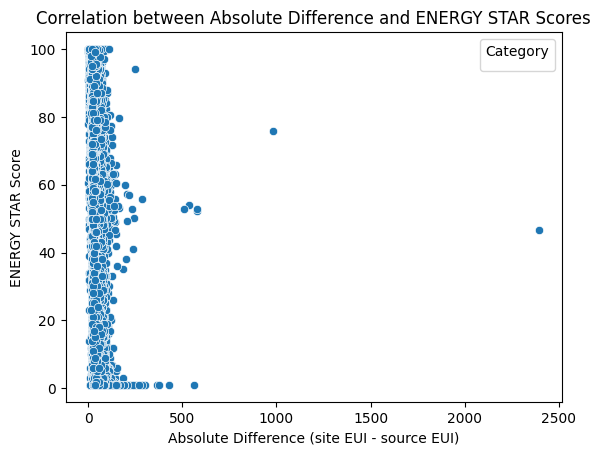

In [525]:
# Understanding the Relationship between Absolute Difference and Energy Star Scores 

# Create a scatter plot
sns.scatterplot(data=df_final, x='Absolute_DIFF', y='ENERGY STAR Score')

# Customize the plot
plt.title("Correlation between Absolute Difference and ENERGY STAR Scores")
plt.xlabel("Absolute Difference (site EUI - source EUI)")
plt.ylabel("ENERGY STAR Score")

# Show the plot
plt.legend(title='Category')
plt.show()

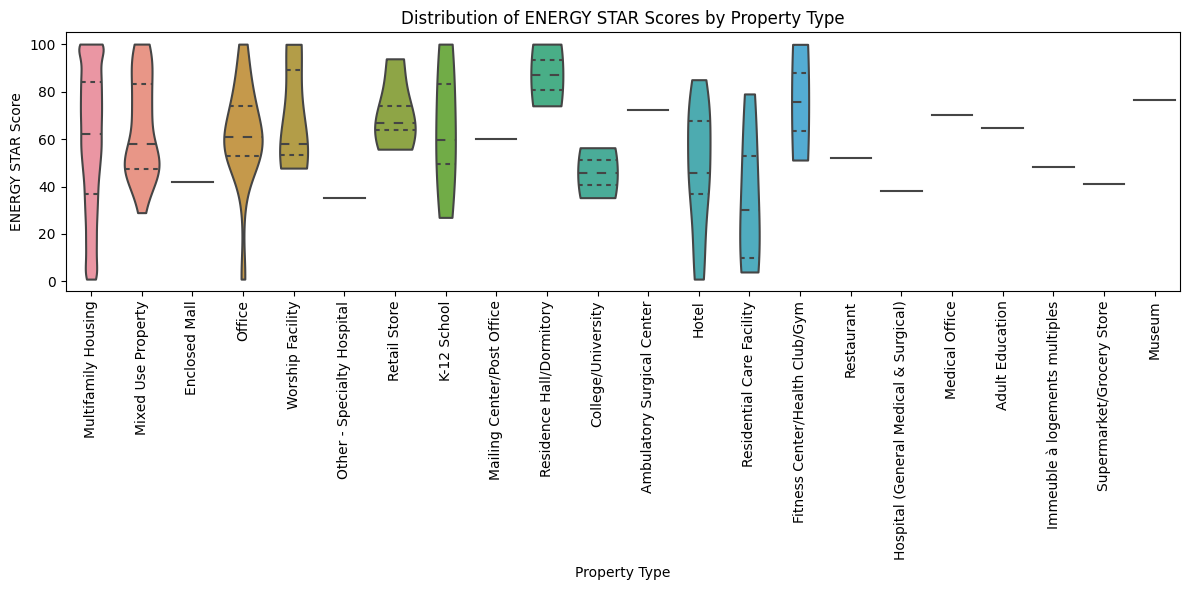

In [526]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df_final'

# Create a violin plot to visualize the distribution of scores by property type
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.violinplot(data=df_final, x='Primary Property Type - Self Selected', y='ENERGY STAR Score', inner="quart", cut=0)

# Customize the plot
plt.title("Distribution of ENERGY STAR Scores by Property Type")
plt.xlabel("Property Type")
plt.ylabel("ENERGY STAR Score")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.show()


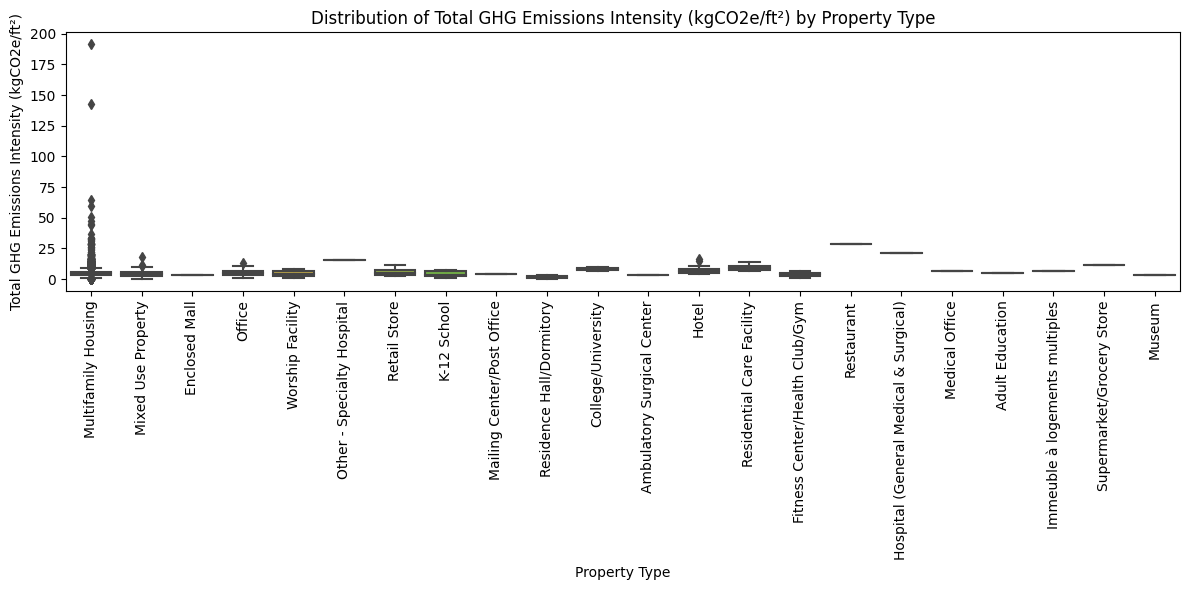

In [527]:
# Create a box plot to visualize the distribution of scores by property type
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.boxplot(data=df_final, x='Primary Property Type - Self Selected', y='Total GHG Emissions Intensity (kgCO2e/ft²)')

# Customize the plot
plt.title("Distribution of Total GHG Emissions Intensity (kgCO2e/ft²) by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Total GHG Emissions Intensity (kgCO2e/ft²)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

In [528]:
df_final.columns

Index(['Property Id', 'Property Name',
       'NYC Building Identification Number (BIN)', 'City', 'Postal Code',
       'Primary Property Type - Self Selected',
       'Primary Property Type - Portfolio Manager-Calculated',
       'List of All Property Use Types at Property',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings', 'ENERGY STAR Score',
       'National Median ENERGY STAR Score',
       'ENERGY STAR Certification - Eligibility', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)',
       'Weather Norm

In [529]:
#here, we can see that the highest 
# Assuming you have a DataFrame called 'df_final'

# Sort the DataFrame by 'ENERGY STAR Score' in ascending order
df_lowest_scores = df_final.sort_values(by='ENERGY STAR Score')

# Select the top rows (e.g., the 10 buildings with the lowest scores)
lowest_scores_buildings = df_lowest_scores.head(10)

# Extract and print the primary property types of these buildings
lowest_scores_property_types = lowest_scores_buildings['Primary Property Type - Self Selected'].tolist()
print("Primary Property Types of Buildings with Lowest ENERGY STAR Scores:")
for property_type in lowest_scores_property_types:
    print(property_type)


Primary Property Types of Buildings with Lowest ENERGY STAR Scores:
Multifamily Housing
Multifamily Housing
Multifamily Housing
Multifamily Housing
Multifamily Housing
Multifamily Housing
Multifamily Housing
Multifamily Housing
Multifamily Housing
Multifamily Housing


In [530]:
#from this string, we can see that only housing buildings have lower star scores
#we will conduct our analysis based on the height of buildings
df_final.columns

Index(['Property Id', 'Property Name',
       'NYC Building Identification Number (BIN)', 'City', 'Postal Code',
       'Primary Property Type - Self Selected',
       'Primary Property Type - Portfolio Manager-Calculated',
       'List of All Property Use Types at Property',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings', 'ENERGY STAR Score',
       'National Median ENERGY STAR Score',
       'ENERGY STAR Certification - Eligibility', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)',
       'Weather Norm

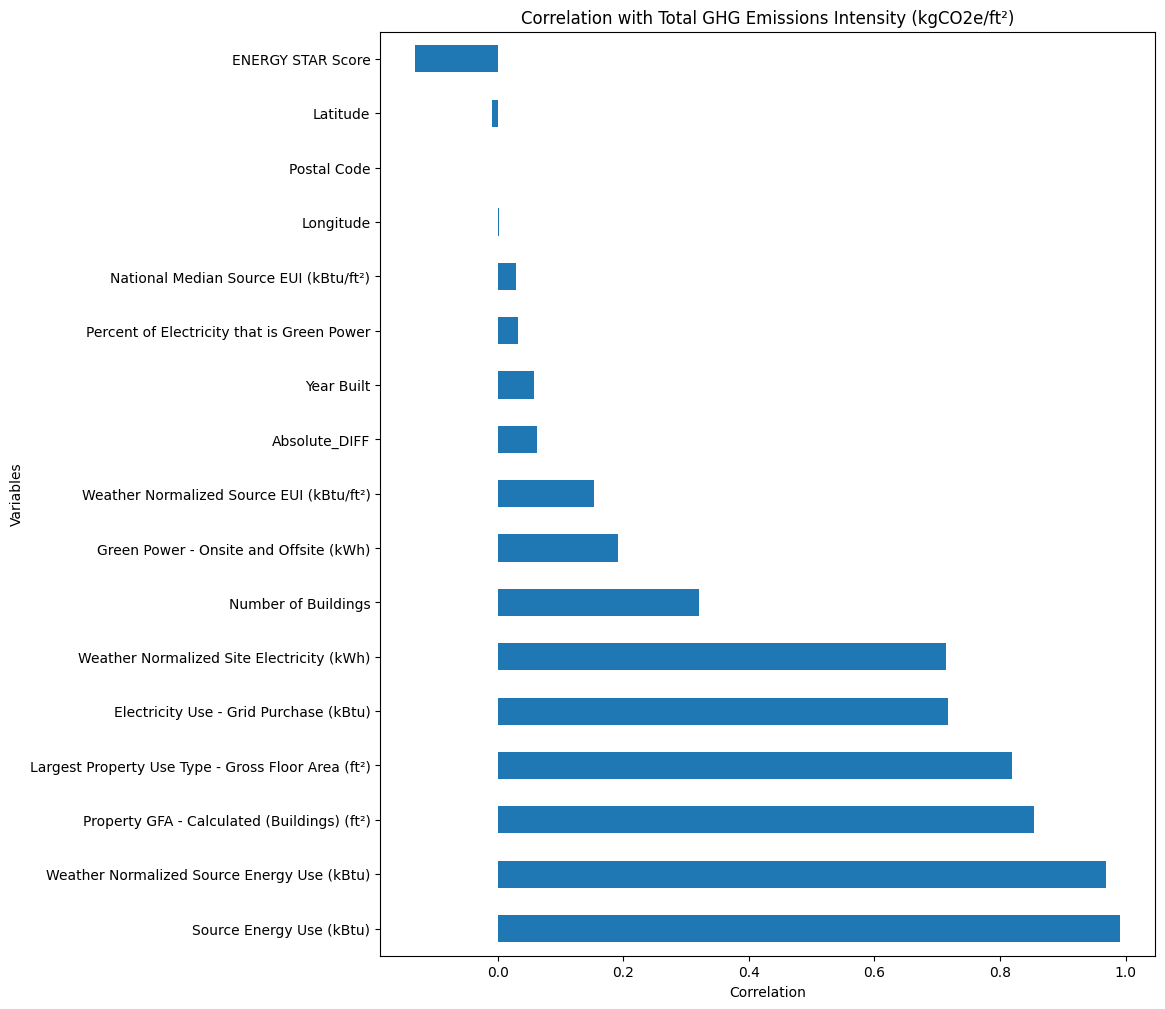

In [531]:
numerical_independent_variables = [
    'Postal Code',
    'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
    'Number of Buildings', 'ENERGY STAR Score', 'Weather Normalized Source EUI (kBtu/ft²)',
    'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)',
    'Weather Normalized Source Energy Use (kBtu)',
    'Electricity Use - Grid Purchase (kBtu)',
    'Weather Normalized Site Electricity (kWh)',
    'Green Power - Onsite and Offsite (kWh)',
    'Percent of Electricity that is Green Power',
    'Property GFA - Calculated (Buildings) (ft²)', 'Latitude', 'Longitude',
    'Total GHG Emissions (Metric Tons CO2e)', 'Absolute_DIFF'
]

# Select the relevant columns from the DataFrame
df_selected = df_final[numerical_independent_variables]

# Calculate the correlation matrix
df_corr = df_selected.corr()

# Plot the correlation of 'Total GHG Emissions Intensity (kgCO2e/ft²)' with other variables
plt.figure(figsize=(10, 12))
(df_corr['Total GHG Emissions (Metric Tons CO2e)']  # Select the column you want to compare with
     .drop('Total GHG Emissions (Metric Tons CO2e)')  # Exclude self-comparison
     .sort_values(ascending=False)
     .plot(kind='barh'))
plt.title("Correlation with Total GHG Emissions Intensity (kgCO2e/ft²)")
plt.xlabel("Correlation")
plt.ylabel("Variables")
plt.show()

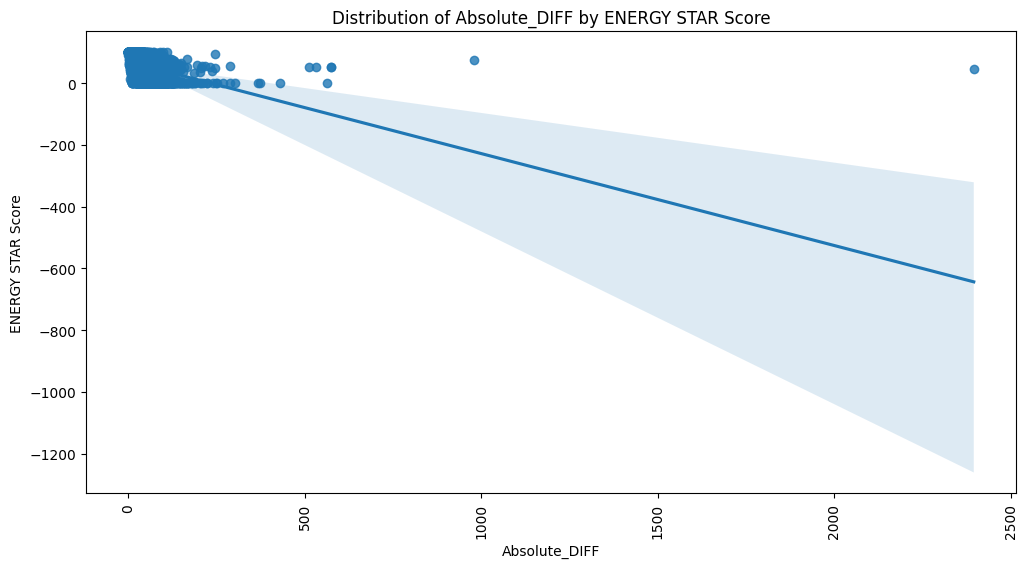

In [532]:
in_variable = 'Absolute_DIFF'
de_variable = 'ENERGY STAR Score'

# Plot the correlation of 'Total GHG Emissions Intensity (kgCO2e/ft²)' with other variables
plt.figure(figsize=(12, 6))
sns.regplot(data=df_final, x=in_variable, y=de_variable)
plt.title(f"Distribution of {in_variable} by {de_variable}")
plt.xlabel(in_variable)
plt.ylabel(de_variable)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

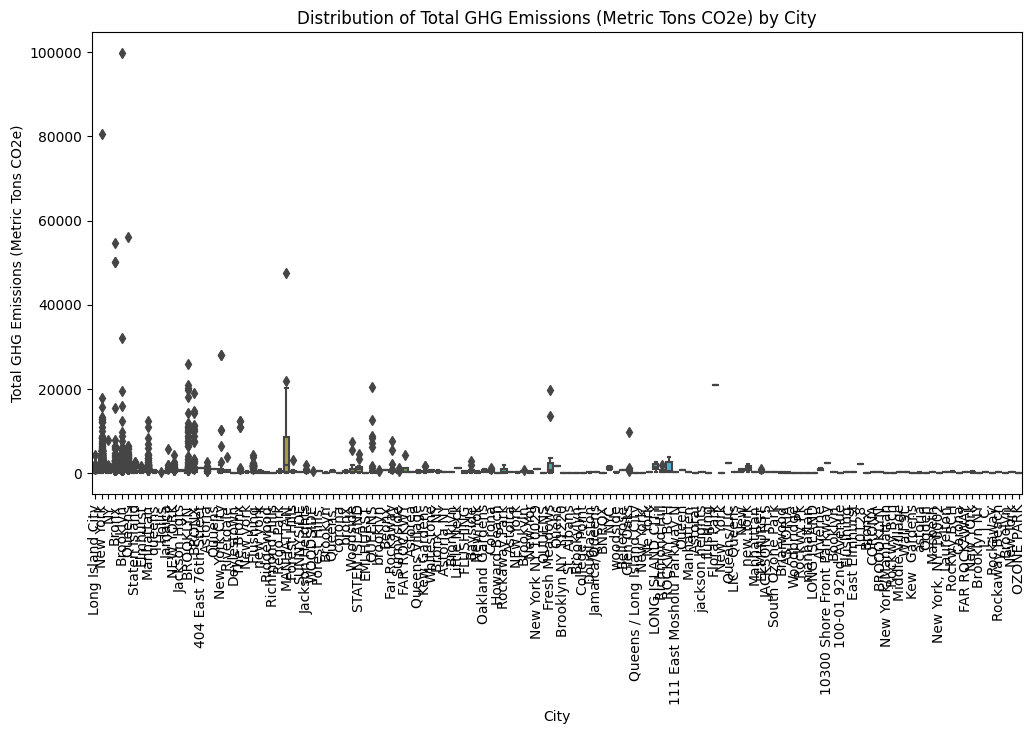

In [533]:
# Select the relevant columns from the DataFrame
categorical_variable = 'City'
numerical_variable = 'Total GHG Emissions (Metric Tons CO2e)'

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_final, x=categorical_variable, y=numerical_variable)
plt.title(f"Distribution of {numerical_variable} by {categorical_variable}")
plt.xlabel(categorical_variable)
plt.ylabel(numerical_variable)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

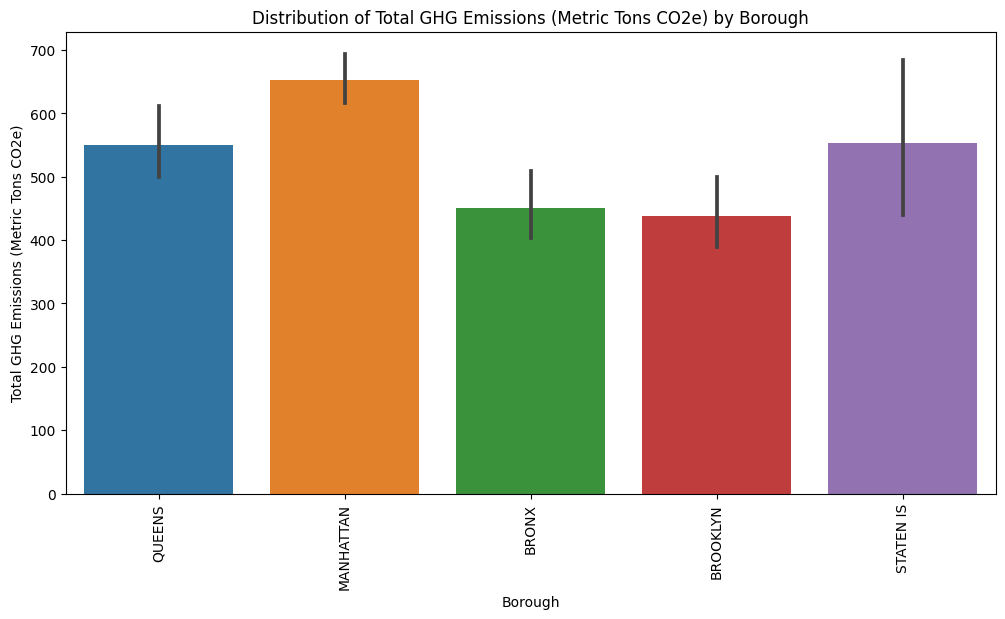

In [534]:
categorical_variable = 'Borough'
numerical_variable = 'Total GHG Emissions (Metric Tons CO2e)'

# Create a box plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_final, x=categorical_variable, y=numerical_variable)
plt.title(f"Distribution of {numerical_variable} by {categorical_variable}")
plt.xlabel(categorical_variable)
plt.ylabel(numerical_variable)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

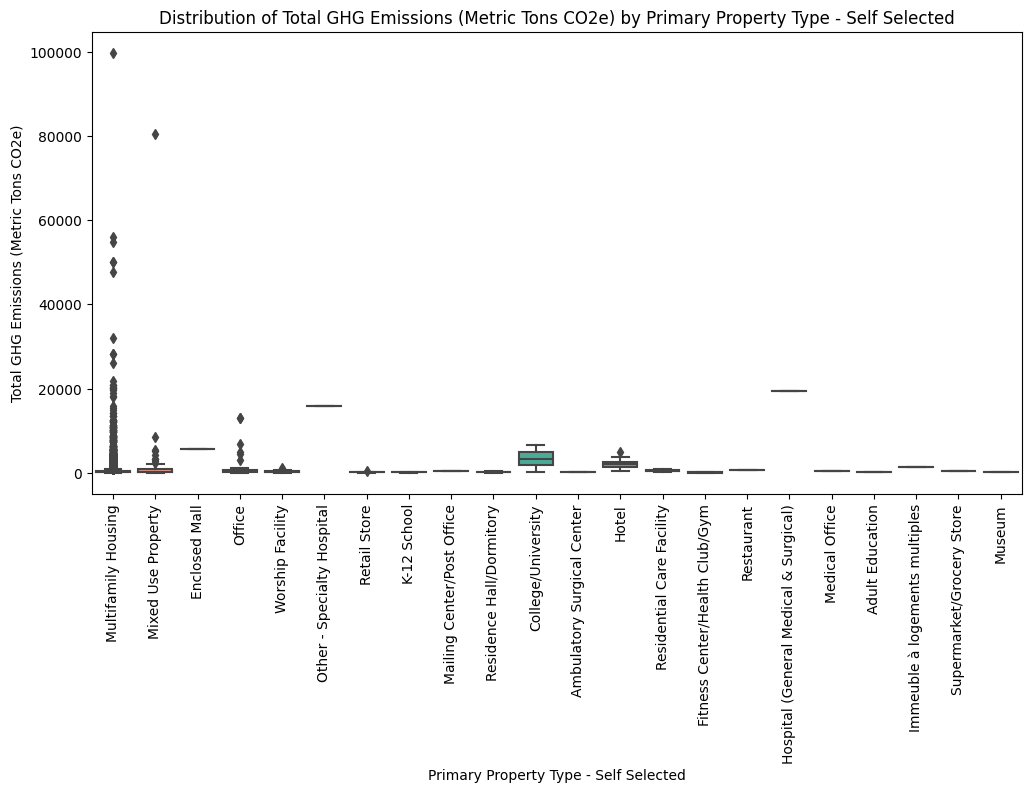

In [535]:
categorical_variable = 'Primary Property Type - Self Selected'
numerical_variable = 'Total GHG Emissions (Metric Tons CO2e)'

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_final, x=categorical_variable, y=numerical_variable)
plt.title(f"Distribution of {numerical_variable} by {categorical_variable}")
plt.xlabel(categorical_variable)
plt.ylabel(numerical_variable)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [536]:
df_final['Total GHG Emissions (Metric Tons CO2e)']

0         107.5
1         398.6
2        1323.0
4         483.4
5         544.8
          ...  
29811     117.0
29813      94.1
29815     105.6
29818     332.9
29833      58.9
Name: Total GHG Emissions (Metric Tons CO2e), Length: 17958, dtype: float64

In [537]:
df_final['National Median Total GHG Emissions (Metric Tons CO2e)']

0         122.7
1         945.9
2        1721.6
4         404.8
5         573.6
          ...  
29811     137.5
29813     128.6
29815      97.2
29818     573.9
29833     109.6
Name: National Median Total GHG Emissions (Metric Tons CO2e), Length: 17958, dtype: float64

In [538]:
df_final_multifamily = df_final[df_final['Primary Property Type - Self Selected'] == 'Multifamily Housing']

In [539]:
df_final_multifamily['Primary Property Type - Self Selected']

0        Multifamily Housing
1        Multifamily Housing
2        Multifamily Housing
4        Multifamily Housing
5        Multifamily Housing
                ...         
29811    Multifamily Housing
29813    Multifamily Housing
29815    Multifamily Housing
29818    Multifamily Housing
29833    Multifamily Housing
Name: Primary Property Type - Self Selected, Length: 17808, dtype: object

In [540]:
df_final_multifamily['GHG Categorical Variable'] = df_final_multifamily['Total GHG Emissions (Metric Tons CO2e)'] - df_final_multifamily['National Median Total GHG Emissions (Metric Tons CO2e)']

In [541]:
df_final_multifamily['GHG Categorical Variable']

0        -15.2
1       -547.3
2       -398.6
4         78.6
5        -28.8
         ...  
29811    -20.5
29813    -34.5
29815      8.4
29818   -241.0
29833    -50.7
Name: GHG Categorical Variable, Length: 17808, dtype: float64

In [542]:
df_final_multifamily['GHG Categorical Variable'] = df_final_multifamily['GHG Categorical Variable'].apply(lambda x: 0 if x < 0 else 1)

In [543]:
df_final_multifamily['GHG Categorical Variable']

0        0
1        0
2        0
4        1
5        0
        ..
29811    0
29813    0
29815    1
29818    0
29833    0
Name: GHG Categorical Variable, Length: 17808, dtype: int64

In [544]:
df_final_multifamily['Multifamily Housing - Number of Bedrooms Density (Number per 1,000 sq ft)']

0        1.20000
1        1.21558
2        1.31636
4        1.32119
5        1.70518
          ...   
29811    1.63471
29813    1.01644
29815    1.36364
29818    1.64000
29833    1.30813
Name: Multifamily Housing - Number of Bedrooms Density (Number per 1,000 sq ft), Length: 17808, dtype: float64

# Now that we know that Multifamily Housing has the highest and largest spread of total GHG Emissions, we want to further understand whether existing properties abide by Local Law 97. 

For context, NYC local law 97, passed in April 2019, aims to reduce carbon emissions by 40% in 2030

Group A (Residential): 0.00675 kgCO2e/ft²
Group B (Business): 0.00846 kgCO2e/ft²
Group E (Educational): 0.00574 kgCO2e/ft²
Group I-1 and I-2 (Institutional): 0.00987 kgCO2e/ft²
Group M (Mercantile): 0.01181 kgCO2e/ft²
Group R-1 (Residential Hotels): 0.00987 kgCO2e/ft²
Group S (Storage): 0.02003 kgCO2e/ft²

In [545]:
#Now that we know which buildings fall into each star score range, we want to find a correlation between low star score, and a difference between source and site eui
net_emissions = ["Total GHG Emissions Intensity (kgCO2e/ft²)"]
net_emissions_index = [df_final.columns.get_loc(col_name) for col_name in net_emissions]
print(net_emissions_index)


[36]


In [546]:
#Next, we want to find out whether or not existing properties are meeting the GHG limits by type of property.

property_type_limits = {
    '[': 0.00846,
    'Hotel': 0.00987,
    'Multifamily Housing': 0.00675,
    'Self-Storage Facility': 0.2003,
    'Strip Mall': 0.01181,
    'College/University': 0.00987,
    'K-12 School': 0.00574
}

# Convert the dictionary to a DataFrame with two columns
property_limit = pd.DataFrame(list(property_type_limits.items()), columns=['Primary Property Type - Self Selected', 'Limit'])

# Print the property_limit DataFrame
print(property_limit)


  Primary Property Type - Self Selected    Limit
0                                     [  0.00846
1                                 Hotel  0.00987
2                   Multifamily Housing  0.00675
3                 Self-Storage Facility  0.20030
4                            Strip Mall  0.01181
5                    College/University  0.00987
6                           K-12 School  0.00574


In [547]:
# We then try to establish the median GHG emissions by housing type 
df['Total GHG Emissions Intensity (kgCO2e/ft²)'] = pd.to_numeric(df['Total GHG Emissions Intensity (kgCO2e/ft²)'], errors='coerce')

# Now calculate the median GHG emissions by housing type
median_ghg_by_housing_type = df.groupby('Primary Property Type - Self Selected')['Total GHG Emissions Intensity (kgCO2e/ft²)'].median()

# The result will be a Series where the index is the housing type and the values are the median GHG emissions for each type.
print(median_ghg_by_housing_type)

Primary Property Type - Self Selected
Adult Education                4.50
Ambulatory Surgical Center    11.70
Aquarium                       0.00
Automobile Dealership          3.65
Bank Branch                    3.75
                              ...  
Vocational School              4.20
Wastewater Treatment Plant    19.75
Wholesale Club/Supercenter     4.80
Worship Facility               2.80
Zoo                            0.00
Name: Total GHG Emissions Intensity (kgCO2e/ft²), Length: 79, dtype: float64


In [548]:
# Finally, we want to check how many peroperties met the GHG emissions limit
selected_housing_types = ['Office', 'Multifamily Housing', 'Self-Storage Facility', 'Strip Mall', 'College/University', 'K-12 School']

# Create a boolean mask for rows where the 'Primary Property Type - Self Selected' is in the selected_housing_types list
mask = df_final['Primary Property Type - Self Selected'].isin(selected_housing_types)

# Apply the mask to calculate the 'fail' column based on the property_limit
property_limit = 123.45  # Replace with your desired limit
df_final['fail'] = (df_final['Total GHG Emissions Intensity (kgCO2e/ft²)'] < property_limit) & mask

# Use value_counts to count the occurrences of True and False in the 'fail' column
split = df_final['fail'].value_counts()

# Display the split
print(split)

# Filter the DataFrame to get rows where 'fail' is False
false_properties = df_final[df_final['fail'] == False]

# Display the first two properties with 'fail' = False
print(false_properties[['Property Name', 'Primary Property Type - Self Selected']].head(2))

fail
True     17850
False      108
Name: count, dtype: int64
                     Property Name Primary Property Type - Self Selected
226  Aqua 3065 Grand Concourse LLC                    Mixed Use Property
402    AKAM - 160 West 66th Street                    Mixed Use Property


In [549]:
# We want to find out what the attributes of the 2 housing properties that met the limits are. 
rows_to_display = df.iloc[[6779, 16854]]

# Print all columns of the selected rows
print(rows_to_display)

       Property Id                      Property Name  \
6779      21322144  2022 Copy of Clearview 6 Bldg A-1   
16854      6669870       708-716 OCEAN COMMUNITY CORP   

                NYC Building Identification Number (BIN)      City  \
6779   4443389;4443384;4443385;4443388;4458409;444338...    Queens   
16854                                            3327291  BROOKLYN   

      Postal Code Primary Property Type - Self Selected  \
6779        11357                   Multifamily Housing   
16854       11226                   Multifamily Housing   

      Primary Property Type - Portfolio Manager-Calculated  \
6779                                 Multifamily Housing     
16854                                Multifamily Housing     

      List of All Property Use Types at Property  \
6779                Multifamily Housing, Parking   
16854                        Multifamily Housing   

      Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
6779                   

# Having identified Multifamily Housing properties releasing the greatest GHG emissions, we now want to predict which features of this housing type contribute the most to GHG emission.

In [550]:
# We first create a multi-regression model to predict GHG emissions based on aspects of Multifamiy housing

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

independent_variables = df_final[['Multifamily Housing - Gross Floor Area (ft²)', 'Multifamily Housing - Number of Bedrooms Density (Number per 1,000 sq ft)',
                 'Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 sq ft)',
                  'Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 sq ft)']]

y = df_final['Total GHG Emissions (Metric Tons CO2e)']
X = independent_variables
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

models = {
    "KNN": KNeighborsRegressor(),
    "OLS": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
}

kfold = KFold(n_splits=5)

cv_scores_without_scaling = {}
cv_scores_with_scaling = {}

for model_name, model in models.items():
    # Without Scaling
    cv_score_without_scaling = cross_val_score(model, X_train, y_train, cv=kfold).mean()
    cv_scores_without_scaling[model_name] = cv_score_without_scaling
    
    # With Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    cv_score_with_scaling = cross_val_score(model, X_train_scaled, y_train, cv=kfold).mean()
    cv_scores_with_scaling[model_name] = cv_score_with_scaling

# Find the best model overall, without and with scaling
best_model_overall = max(cv_scores_with_scaling, key=cv_scores_with_scaling.get)
best_model_without_scaling = max(cv_scores_without_scaling, key=cv_scores_without_scaling.get)
best_model_with_scaling = max(cv_scores_with_scaling, key=cv_scores_with_scaling.get)

print("Cross-Validation Scores (Without Scaling):")
for model_name, cv_score in cv_scores_without_scaling.items():
    print(f"{model_name}: {cv_score}")

print("\nCross-Validation Scores (With Scaling):")
for model_name, cv_score in cv_scores_with_scaling.items():
    print(f"{model_name}: {cv_score}")

print("Best Model Overall:", best_model_overall)
print("Best Model Without Scaling:", best_model_without_scaling)
print("Best Model With Scaling:", best_model_with_scaling)

Cross-Validation Scores (Without Scaling):
KNN: 0.5642421327998564
OLS: 0.5916976598373038
Ridge: 0.5917037967870261
Lasso: 0.5924042847610931

Cross-Validation Scores (With Scaling):
KNN: 0.5516132802535182
OLS: 0.5916976598372747
Ridge: 0.5917433471973914
Lasso: 0.592691873354206
Best Model Overall: Lasso
Best Model Without Scaling: Lasso
Best Model With Scaling: Lasso


In [551]:
# TO improve the robustness of the model, we make sure to tune the model to improve the model's CV score. 

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso

param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 10, 11, 13]
}

param_grid_ridge = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
}

param_grid_lasso = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
}

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=kfold)
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=kfold)
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=kfold)

grid_knn.fit(X_train_scaled, y_train)
grid_ridge.fit(X_train_scaled, y_train)
grid_lasso.fit(X_train_scaled, y_train)

tuned_knn_best_score = grid_knn.best_score_
tuned_ridge_best_score = grid_ridge.best_score_
tuned_lasso_best_score = grid_lasso.best_score_
best_tuned_model = max([(tuned_knn_best_score, "KNN"), (tuned_ridge_best_score, "Ridge"), (tuned_lasso_best_score, "Lasso")])

print("Best Tuned KNN Mean CV Score:", tuned_knn_best_score)
print("Best Tuned Ridge Mean CV Score:", tuned_ridge_best_score)
print("Best Tuned Lasso Mean CV Score:", tuned_lasso_best_score)
print("Best Overall Tuned Model:", best_tuned_model[1], "with Mean CV Score of", best_tuned_model[0])

Best Tuned KNN Mean CV Score: 0.6355748052710252
Best Tuned Ridge Mean CV Score: 0.5921529436660081
Best Tuned Lasso Mean CV Score: 0.6000490521111574
Best Overall Tuned Model: KNN with Mean CV Score of 0.6355748052710252


In [552]:
#Finally, we try to understand what features are the most important to the model.

best_ridge_model = grid_ridge.best_estimator_
best_lasso_model = grid_lasso.best_estimator_

ridge_coefficients = best_ridge_model.coef_
lasso_coefficients = best_lasso_model.coef_

coefficients = pd.DataFrame({'Feature': X.columns, 'Ridge Coefficient': ridge_coefficients, 'Lasso Coefficient': lasso_coefficients})
print(coefficients)

                                             Feature  Ridge Coefficient  \
0       Multifamily Housing - Gross Floor Area (ft²)        1424.320337   
1  Multifamily Housing - Number of Bedrooms Densi...          20.553038   
2  Multifamily Housing - Number of Residential Li...         -11.172416   
3  Multifamily Housing - Number of Residential Li...          35.278826   

   Lasso Coefficient  
0        1411.451811  
1          11.211945  
2          -0.785896  
3          29.621672  


# To further support our data prediction modeling, we make use of logistic regression.

In [584]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Calculate the GHG Categorical Variable
df_final['GHG Categorical Variable'] = df_final['Total GHG Emissions (Metric Tons CO2e)'] - df_final_multifamily['National Median Total GHG Emissions (Metric Tons CO2e)']

# Select the relevant columns for the logistic regression model
X = df_final[['Multifamily Housing - Gross Floor Area (ft²)',
              'Multifamily Housing - Number of Bedrooms Density (Number per 1,000 sq ft)',
              'Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 sq ft)',
              'Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 sq ft)']]

# Define your threshold for classification
threshold = 0.5

# Create a new target variable (y) based on the threshold
y = (df_final['GHG Categorical Variable'] > threshold).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)


LogisticRegression()

In [585]:
y_pred = logistic_regression_model.predict(X_test)

In [586]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.6232453677709152
Confusion Matrix:
[[2220    0]
 [1342    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      2220
           1       0.00      0.00      0.00      1342

    accuracy                           0.62      3562
   macro avg       0.31      0.50      0.38      3562
weighted avg       0.39      0.62      0.48      3562

